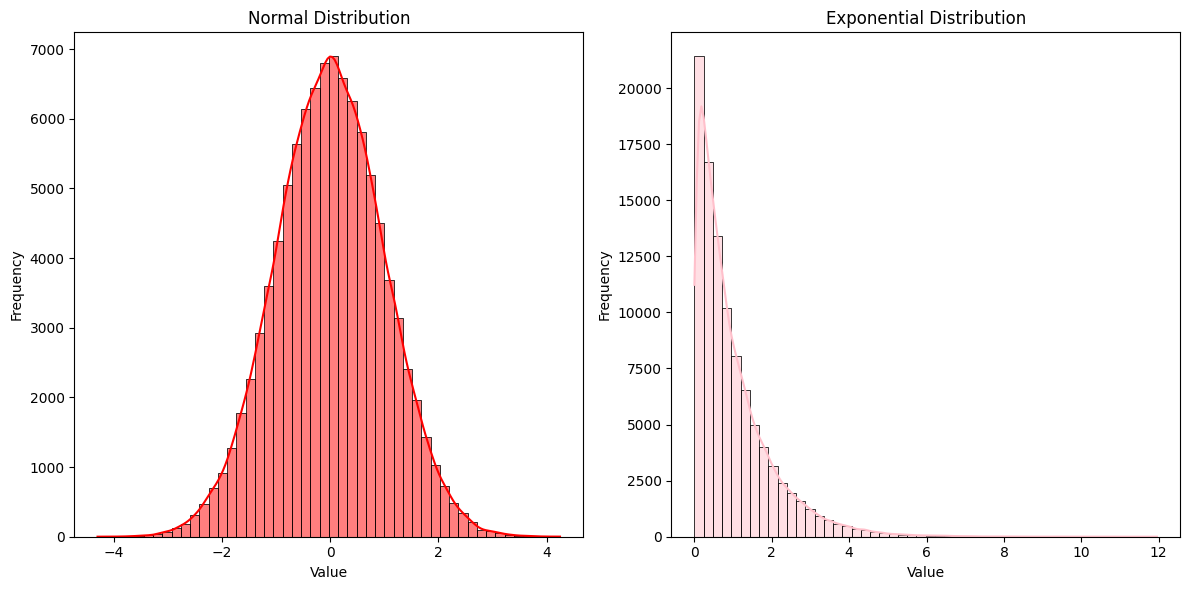

In [4]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


sample_size = 100000


normal_samples = np.random.normal(loc=0, scale=1, size=sample_size)  
exponential_samples = np.random.exponential(scale=1, size=sample_size)  


plt.figure(figsize=(12, 6))


plt.subplot(1, 2, 1)
sns.histplot(normal_samples, bins=50, kde=True, color='red')
plt.title("Normal Distribution")
plt.xlabel("Value")
plt.ylabel("Frequency")

plt.subplot(1, 2, 2)
sns.histplot(exponential_samples, bins=50, kde=True, color='pink')
plt.title("Exponential Distribution")
plt.xlabel("Value")
plt.ylabel("Frequency")

plt.tight_layout()
plt.show()


In [9]:

import scipy.stats as stats

def calculate_vectorized(data):
    mean = np.mean(data)
    median = np.median(data)
    variance = np.var(data)
    mad = np.mean(np.abs(data - mean))
    skewness = stats.skew(data)
    kurtosis = stats.kurtosis(data)
    iqr = np.percentile(data, 75) - np.percentile(data, 25)
    return mean, median, variance, mad, skewness, kurtosis, iqr


def calculate_loops(data):
    # 길이 계산
    n = 0
    for _ in data:
        n += 1

    # 평균 계산
    total_sum = 0
    for x in data:
        total_sum += x
    mean = total_sum / n

    # 데이터 정렬
    sorted_data = data[:]
    for i in range(n):
        for j in range(i + 1, n):
            if sorted_data[i] > sorted_data[j]:
                sorted_data[i], sorted_data[j] = sorted_data[j], sorted_data[i]

    # 중앙값 계산
    if n % 2 == 1:
        median = sorted_data[n // 2]
    else:
        median = (sorted_data[n // 2 - 1] + sorted_data[n // 2]) / 2

    # 분산 계산
    variance_sum = 0
    for x in data:
        variance_sum += (x - mean) ** 2
    variance = variance_sum / n

    # 절대 편차의 평균 계산
    mad_sum = 0
    for x in data:
        mad_sum += abs(x - mean)
    mad = mad_sum / n

    # 왜도 계산
    skewness_sum = 0
    for x in data:
        skewness_sum += (x - mean) ** 3
    skewness = (skewness_sum / n) / (variance ** 1.5)

    # 첨도 계산
    kurtosis_sum = 0
    for x in data:
        kurtosis_sum += (x - mean) ** 4
    kurtosis = (kurtosis_sum / n) / (variance ** 2) - 3

    # 사분위 범위 계산
    q1_index = int(0.25 * n)
    q3_index = int(0.75 * n)
    iqr = sorted_data[q3_index] - sorted_data[q1_index]

    return mean, median, variance, mad, skewness, kurtosis, iqr



In [11]:
vectorized_normal = calculate_vectorized(normal_samples)
vectorized_exponential = calculate_vectorized(exponential_samples)

print("벡터화로 구한 정규의 통계량:", vectorized_normal)

print("\n벡터화로 구한 지수의 통계량:", vectorized_exponential)


벡터화로 구한 정규의 통계량: (-0.006183143374538243, -0.006509914082430952, 0.9972874772331161, 0.7974252944351315, -0.009572812278959867, 0.00013559258444173494, 1.3548164841507329)

벡터화로 구한 지수의 통계량: (0.9992670879816408, 0.6932205250845452, 0.9915514696427213, 0.7353625378888233, 1.9591725973401473, 5.69423067921325, 1.099642529492349)


In [13]:
loop_normal = calculate_loops(normal_samples)
loop_exponential = calculate_loops(exponential_samples)

print("벡터화 X ,정규:", loop_normal)
print("\n벡터화 X, 지수:", loop_exponential)

벡터화 X ,정규: (-0.006183143374538357, -0.006509914082430952, 0.9972874772331226, 0.7974252944351362, -0.009572812278959392, 0.0001355925843862238, 1.3548331117479433)

벡터화 X, 지수: (0.9992670879816431, 0.6932205250845452, 0.9915514696427257, 0.7353625378888164, 1.9591725973400995, 5.694230679213224, 1.0996791243757478)
